# Reconociiento de imágenes

In [1]:
#!pip install tensorflow
#!python -m pip install --user opencv-python


In [2]:
#!python -m pip install --user keras

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import os

#importamos tensorflow 2.0 y keras
import tensorflow as tf
from tensorflow import keras


#Usaremos datetime para nombrar archivos
import datetime

import numpy as np
import matplotlib.pyplot as plt

#para cargar imagenes desde internet usaremos estas librerias
from PIL import Image
import requests
from io import BytesIO

#lo usaremos para reescalar imagen
import cv2

print(tf.__version__)


2.1.0


## Importamos el dataset

Usaremos 60,000 imágenes para entrenar y 10,000 imágenes para evaluar con qué precisión aprendió la red para clasificar imágenes. Podemos acceder al Fashion MNIST directamente desde TensroFlow.

Importamos y cargamos los datos de Fashion MNIST directamente desde TensroFlow


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) =fashion_mnist.load_data()

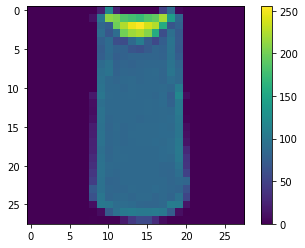

In [3]:
plt.figure()
plt.imshow(train_images[2])
plt.colorbar()
plt.grid(False)
plt.show()


Las etiquetas son una matriz de enteros, que van de 0 a9. Estas corresponden a la clase de vestimenta que representa la imagen:

In [4]:
class_names =['Camiseta','Pantalón','Suéter','Vestido', 'Abrigo', 'Sandalia', 'Camisa', 'Tenis', 'Bolso', 'Botines']

## Exploramos datos

In [5]:
#muestra la forma(tamaño) de la primera imagen de entrenamienta
train_images[0].shape

(28, 28)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
train_labels.shape

(60000,)

In [8]:
test_labels.shape

(10000,)

In [9]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [10]:
test_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

<br><br>


## Pre-procesamiento de datos


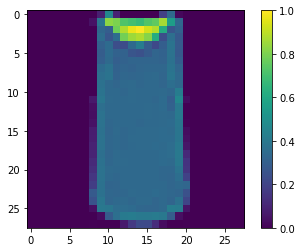

In [11]:
#Las cifras que componen las imagenes tomaran valores entre 0 y 1
train_images= train_images / 255
test_images = test_images / 255

plt.figure()
plt.imshow(train_images[2])
plt.colorbar()
plt.grid(False)
plt.show()


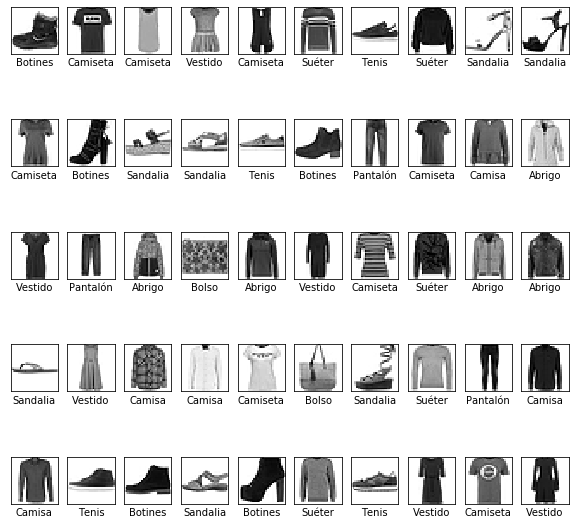

In [12]:
plt.figure(figsize=(10,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Configuramos la red neuronal

In [ ]:
 #keras.Sequencial: crea la red neuronal
    
model = keras.Sequential([  
    #Creacion de capas de la red Neuronal
    keras.layers.Flatten(input_shape=(28,28)),#capas de entrada
    keras.layers.Dense(20, activation='relu'),#capa intermedia
    keras.layers.Dense(10, activation = 'softmax')# capa de salida
])

In [92]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                210       
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics =['accuracy'])

In [94]:
checkpoint_path = "checkpoints/check"
log_dir = "logs/fit/" + datetime.datetime.now()strftime("%Y%m%d-%H%M%S")
cp_callbacks = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_weights_only= True, verbose=1)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir,histogram_freq =1)

model.fit(train_images,
          train_labels,
          epochs = 50,
          validation_data = (test_images, test_labels),
          callbacks = [cp_callbacks, tensorboard_callback])

Train on 60000 samples
Epoch 1/20
59840/60000 [============================>.] - ETA: 0s - loss: 0.5808 - accuracy: 0.8016
Epoch 00001: saving model to checkpoints/check
60000/60000 [==============================] - 4s 74us/sample - loss: 0.5803 - accuracy: 0.8017
Epoch 2/20
59488/60000 [============================>.] - ETA: 0s - loss: 0.4368 - accuracy: 0.8468
Epoch 00002: saving model to checkpoints/check
60000/60000 [==============================] - 4s 69us/sample - loss: 0.4367 - accuracy: 0.8467
Epoch 3/20
59840/60000 [============================>.] - ETA: 0s - loss: 0.4080 - accuracy: 0.8554
Epoch 00003: saving model to checkpoints/check
60000/60000 [==============================] - 4s 69us/sample - loss: 0.4081 - accuracy: 0.8554
Epoch 4/20
59680/60000 [============================>.] - ETA: 0s - loss: 0.3859 - accuracy: 0.8633
Epoch 00004: saving model to checkpoints/check
60000/60000 [==============================] - 4s 74us/sample - loss: 0.3855 - accuracy: 0.8633
Epoch

In [95]:
test_loss,test_acc = model.evaluate(test_images, test_labels)
print('Precision ->', test_acc)

10000/10000 [==============================] - 1s 55us/sample - loss: 0.3838 - accuracy: 0.8636
Precision -> 0.8636


# Hagamos predicciones

In [30]:
predictions = model.predict(test_images)


In [31]:
predictions[0]

array([2.4412252e-06, 2.0868771e-07, 1.6846518e-06, 3.5651767e-06,
       6.5966691e-07, 1.4799468e-02, 5.5912051e-07, 3.3849277e-02,
       3.1568704e-04, 9.5102638e-01], dtype=float32)

In [32]:
np.argmax(predictions[0])

9

## Probemos el modelo con una imagen externa y ajena al dataset

Muy importante:

La imagen a comprobar debe ser ingresada luego de recibir el ismo procesamiento que recibieron las imagenes de entrenamiento

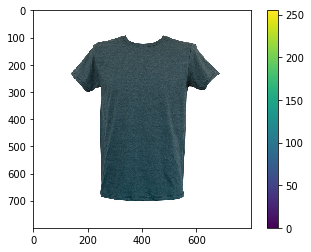

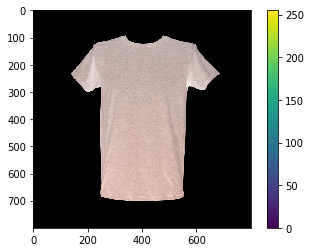

In [81]:
response = requests.get("https://www.playerasmark.com/wp-content/uploads/2017/10/botella-ho-1.jpg")
img = Image.open(BytesIO(response.content))

np_img = np.array(img)

plt.figure()
plt.imshow(np_img)
plt.colorbar()
plt.grid(False)
plt.show()

#invertimos la imagen
np_img = 255 - np_img

plt.figure()
plt.imshow(np_img)
plt.colorbar()
plt.grid(False)
plt.show()


In [82]:
np_img.shape

(800, 800, 3)

In [64]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3],[0.333,0.333,0.333])

In [65]:
bw_image = rgb2gray(np_img)

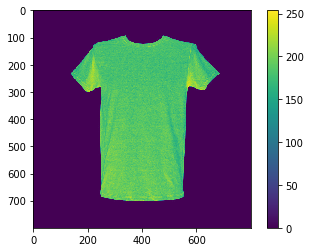

In [66]:
plt.figure()
plt.imshow(bw_image)
plt.colorbar()
plt.grid(False)
plt.show()

In [67]:
bw_image.shape

(800, 800)

In [68]:
res = cv2.resize(bw_image, dsize = (28,28), interpolation = cv2.INTER_CUBIC)

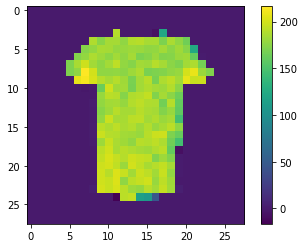

In [69]:
plt.figure()
plt.imshow(res)
plt.colorbar()
plt.grid(False)
plt.show()

In [70]:
res = res/255

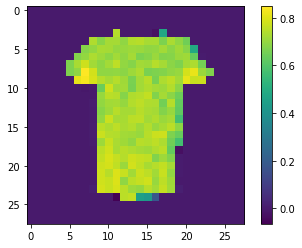

In [71]:
plt.figure()
plt.imshow(res)
plt.colorbar()
plt.grid(False)
plt.show()

In [72]:
x =np.zeros((1,28,28))
x.shape

(1, 28, 28)

In [88]:
x[0]= np.array(res)

In [96]:
predictions = model.predict(x)
predictions

array([[4.0401310e-01, 3.4811355e-02, 1.7281120e-01, 2.8590536e-01,
        9.3500903e-03, 3.1642256e-07, 9.1585368e-02, 1.7946932e-06,
        1.5195130e-03, 1.8023344e-06]], dtype=float32)

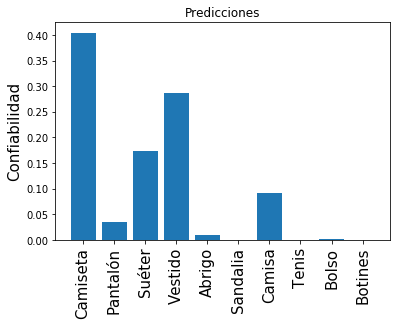

In [97]:
index = np.arange(len(class_names))
plt.bar(index, predictions[0])
plt.ylabel('Confiabilidad', fontsize=15)
plt.xticks(index,class_names, fontsize=15, rotation = 90)
plt.title('Predicciones')
plt.show()

## Creamos un nuevo modelo y lo probamos antes de entrenarlo

In [105]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(20, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])
model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics =['accuracy'])


In [106]:
loss,acc =model2.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 98us/sample - loss: 2.4398 - accuracy: 0.0756


In [107]:
acc


0.0756

### Como podemos ver el rendimiento del modelo es muy malo

### Por lo que ahora cargaremos los pesos que hemos guardado en el nuevo modelo

In [109]:
model2.load_weights(checkpoint_path)

## Aplicando convolucion a nuestro modelo


Hasta este momento nuestro modelo clasifica los diferentes tipos de prenda a partir de patrones en los valores que adoptan los pixeles de cada imagen. Esto implica una serie de limitaciones o condiciones que se deben cumplir para que el modelo funcione:
* La imagen requiere de un fondo blanco
* La prenda de vestir debe ubicarse en el centro y con una orientacion epecifica